In [38]:
import pandas as pd
import numpy as np
X=pd.read_csv('Data.csv')
Y=pd.read_csv('Class.csv')
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [39]:
X=X[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]
Y=Y['Potability']


In [40]:
#pip install tensorflow

In [41]:
from sklearn.exceptions import ConvergenceWarning

from warnings import simplefilter

simplefilter(action='ignore', category=ConvergenceWarning)

In [42]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

<h2>Standardization</h2>

In [43]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()

#fit only on training data
#scaler.fit(X_train)
#X_train=scaler.fit_transform(X_train)

#apply same transformation to test data
#X_test=sc_X.transform(X_test)

#result will be from 0 to 1 or from -1 to +1
#X_train


<h2>Normalization</h2>

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=7)

from sklearn.preprocessing import MinMaxScaler
sc_X=MinMaxScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)
#X_train #result is between 0 and 1
y_train

619     0
1197    1
801     1
3915    1
739     1
       ..
1603    1
2550    0
537     0
1220    1
175     0
Name: Potability, Length: 3196, dtype: int64

# 

<h1><font size=25, face='Times New Roman'>1. Support Vector Machine</font></h1>

In [45]:
#gamma='auto', kernel='rbf'
svm_classifier=SVC(C=100, random_state=0)
svm_classifier.fit(X_train,y_train)
svm_pred=svm_classifier.predict(X_test)
print('\n****************************************************************\n')
print('Accuracy                     : ',accuracy_score(y_test,svm_pred)*100,'%')
print('Precision / 1-Sensitivity    : ',precision_score(y_test,svm_pred)*100,'%')
print('Recall / Sensitivity         : ',recall_score(y_test,svm_pred)*100,'%')
print('F1 Score                     : ',f1_score(y_test,svm_pred)*100,'%')
print('________________________________________________________________\n')
print('Confusion Matrix\n')
print('',confusion_matrix(y_test,svm_pred))
print('\n****************************************************************')


****************************************************************

Accuracy                     :  71.125 %
Precision / 1-Sensitivity    :  68.8787185354691 %
Recall / Sensitivity         :  76.01010101010101 %
F1 Score                     :  72.26890756302521 %
________________________________________________________________

Confusion Matrix

 [[268 136]
 [ 95 301]]

****************************************************************


<font size=20, face='Times New Roman'>K-Fold-SVM</font>

In [46]:
svm_pred=cross_val_predict(svm_classifier,X_test, y_test)

#change the value of cv to see the change
scores_test=cross_val_score(svm_classifier,X_test, y_test, cv=7)
print("Average : ",np.mean(scores_test)*100,'%')

Average :  61.00141658494061 %


# 

<h1><font size=25, face='Times New Roman'>2. Decision Tree</font></h1>

In [47]:
#X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=5)
#max_leaf_nodes=8,criterion='entropy', max_depth=10, max_features=9, min_samples_split= 2
dt_classifier=DecisionTreeClassifier(random_state=7)
dt_classifier.fit(X_train,y_train)
dt_pred=dt_classifier.predict(X_test)
print('\n****************************************************************\n')
print('Accuracy                     : ',accuracy_score(y_test,dt_pred)*100,'%')
print('Precision / 1-Sensitivity    : ',precision_score(y_test,dt_pred)*100,'%')
print('Recall / Sensitivity         : ',recall_score(y_test,dt_pred)*100,'%')
print('F1 Score                     : ',f1_score(y_test,dt_pred)*100,'%')
print('________________________________________________________________\n')
print('Confusion Matrix\n')
print('',confusion_matrix(y_test,dt_pred))
print('\n****************************************************************')


****************************************************************

Accuracy                     :  71.375 %
Precision / 1-Sensitivity    :  67.88008565310493 %
Recall / Sensitivity         :  80.05050505050505 %
F1 Score                     :  73.46465816917728 %
________________________________________________________________

Confusion Matrix

 [[254 150]
 [ 79 317]]

****************************************************************


<font size=20, face='Times New Roman'>K-Fold-DT</font>

In [48]:

dt_pred=cross_val_predict(dt_classifier,X_test, y_test)
scores_test=cross_val_score(dt_classifier,X_test, y_test, cv=7)
print("Average : ",np.mean(scores_test)*100,'%')

Average :  60.62656641604009 %


# 

<h1><font size=25, face='Times New Roman'>3. Sequential Neural Network</font></h1>

In [49]:
mod_sq=Sequential()
mod_sq.add(Dense(200,input_dim=9,activation='relu'))
mod_sq.add(Dense(200,input_dim=200,activation='relu'))
mod_sq.add(Dense(1,activation='sigmoid'))

mod_sq.compile(loss='mse', optimizer='adam', metrics='accuracy')
history=mod_sq.fit(X_train, y_train, epochs=30, batch_size=4, validation_data=(X_train, y_train), verbose=1)

loss, accuracy = mod_sq.evaluate(X_test, y_test)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

Epoch 1/30
799/799 [==============================] - 5s 5ms/step - loss: 0.2512 - accuracy: 0.5019 - val_loss: 0.2478 - val_accuracy: 0.5663
Epoch 2/30
799/799 [==============================] - 3s 4ms/step - loss: 0.2476 - accuracy: 0.5382 - val_loss: 0.2411 - val_accuracy: 0.5882
Epoch 3/30
799/799 [==============================] - 4s 5ms/step - loss: 0.2420 - accuracy: 0.5729 - val_loss: 0.2411 - val_accuracy: 0.5313
Epoch 4/30
799/799 [==============================] - 3s 4ms/step - loss: 0.2386 - accuracy: 0.5860 - val_loss: 0.2321 - val_accuracy: 0.6117
Epoch 5/30
799/799 [==============================] - 3s 4ms/step - loss: 0.2338 - accuracy: 0.5989 - val_loss: 0.2286 - val_accuracy: 0.6123
Epoch 6/30
799/799 [==============================] - 4s 5ms/step - loss: 0.2299 - accuracy: 0.6123 - val_loss: 0.2218 - val_accuracy: 0.6324
Epoch 7/30
799/799 [==============================] - 3s 4ms/step - loss: 0.2249 - accuracy: 0.6283 - val_loss: 0.2179 - val_accuracy: 0.6439
Epoch 

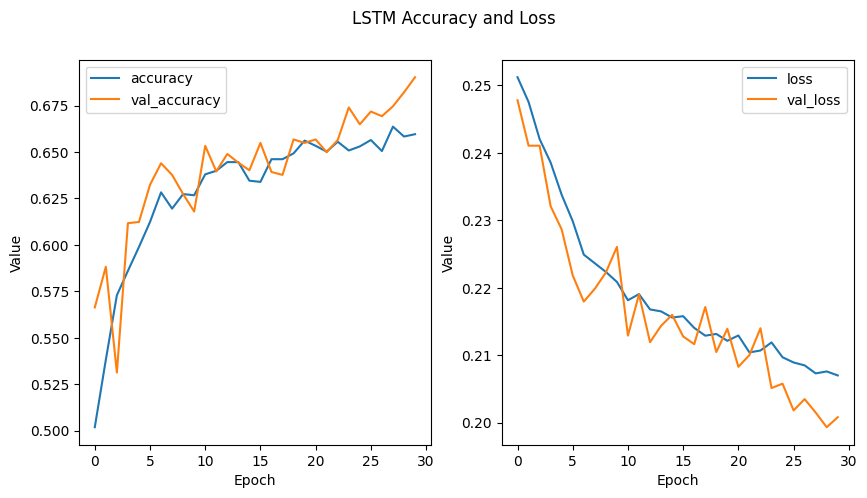

In [51]:
import matplotlib.pyplot as plt

# Create a figure with two subplots 
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the accuracy and validation accuracy curves in the first subplot
axs[0].plot(history.history['accuracy'], label='accuracy')
axs[0].plot(history.history['val_accuracy'], label='val_accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Value')
axs[0].legend()

# Plot the loss and validation loss curves in the second subplot
axs[1].plot(history.history['loss'], label='loss')
axs[1].plot(history.history['val_loss'], label='val_loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Value')
axs[1].legend()

fig.suptitle('LSTM Accuracy and Loss')


# Save the figure as a PNG file
# fig.savefig('results/LSTM_accuracy_loss_curves_8020-4.png')


# Display the figure
plt.show()

In [32]:

predictions=mod_sq.predict(X_test)
sq_pred = (predictions > 0.5)
confusion_matrix(y_test, sq_pred)
# print('Precision       : ',precision_score(y_test, sq_pred)*100,'%')
# print('Recall          : ',recall_score(y_test, sq_pred)*100,'%')
# print('F1 Score        : ',f1_score(y_test, sq_pred)*100,'%')
print(np.mean(predictions))

25/25 [==============================] - 0s 1ms/step
0.5182098


In [33]:
cm=confusion_matrix(y_test, y_pred)
print('Cofusion Matrix\n',cm)

Cofusion Matrix
 [[404   0]
 [396   0]]


# 

<font size=20, face='Times New Roman'>4. MLPC</font>

In [34]:
#NN MLPC
mod_nn=MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(5), random_state=7)
mod_nn.fit(X_train, y_train)
nn_pred1=mod_nn.predict(X_test)
print('Accuracy                     : ',accuracy_score(y_test,nn_pred1)*100,'%')
print('Precision / 1-Sensitivity    : ',precision_score(y_test,nn_pred1)*100,'%')
print('Recall / Sensitivity         : ',recall_score(y_test,nn_pred1)*100,'%')
print('F1 Score                     : ',f1_score(y_test,nn_pred1)*100,'%')
print('________________________________________________________________\n')
print('Confusion Matrix\n')
print('',confusion_matrix(y_test,nn_pred1))
print('\n****************************************************************')

Accuracy                     :  49.375 %
Precision / 1-Sensitivity    :  48.825065274151434 %
Recall / Sensitivity         :  47.22222222222222 %
F1 Score                     :  48.01026957637997 %
________________________________________________________________

Confusion Matrix

 [[208 196]
 [209 187]]

****************************************************************


<font size=20, face='Times New Roman'>K-Fold-MLPC</font>

In [35]:
nn_pred2=cross_val_predict(mod_nn,X_test,y_test)
scores_test=cross_val_score(mod_nn,X_test, y_test, cv=7)
print("K-Fold Average : ",np.mean(scores_test)*100,'%')

K-Fold Average :  51.0057753078348 %


<h1><font size=25, face='Times New Roman'>5. Naive Bayes</font></h1>

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=7)

nb_classifier=MultinomialNB()
nb_classifier.fit(X_train,y_train)
nb_pred=nb_classifier.predict(X_test)
print('\n****************************************************************\n')
print('Accuracy                     : ',accuracy_score(y_test,nb_pred)*100,'%')
print('Precision / 1-Sensitivity    : ',precision_score(y_test,nb_pred)*100,'%')
print('Recall / Sensitivity         : ',recall_score(y_test,nb_pred)*100,'%')
print('F1 Score                     : ',f1_score(y_test,nb_pred)*100,'%')
print('________________________________________________________________\n')
print('Confusion Matrix\n')
print('',confusion_matrix(y_test,nb_pred))
print('\n****************************************************************')


****************************************************************

Accuracy                     :  55.625 %
Precision / 1-Sensitivity    :  55.26992287917738 %
Recall / Sensitivity         :  54.292929292929294 %
F1 Score                     :  54.77707006369427 %
________________________________________________________________

Confusion Matrix

 [[230 174]
 [181 215]]

****************************************************************


<font size=20, face='Times New Roman'>K-Fold-NB</font>

In [37]:

nb_pred=cross_val_predict(nb_classifier,X_test, y_test)
scores_test=cross_val_score(nb_classifier,X_test, y_test, cv=10)
print("Average : ",np.mean(scores_test)*100,'%')

Average :  56.125 %
